In [1]:
import pandas as pd

df = pd.read_csv('../data/togo-dapaong_qc.csv')  
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [3]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [4]:
df.select_dtypes(include='object').nunique()

Timestamp    525600
dtype: int64

In [5]:
df.select_dtypes(include='number').nunique().sort_values(ascending=False)

ModA             10672
DNI               9612
GHI               8633
ModB              8439
DHI               6841
WD                3601
RH                 966
TModB              769
WDstdev            614
TModA              564
Tamb               266
WSgust             156
WS                 143
WSstdev             44
Precipitation       22
BP                  16
Cleaning             2
Comments             0
dtype: int64

In [6]:
df.isna().sum().sort_values(ascending=False)

Comments         525600
WSstdev               0
TModB                 0
TModA                 0
Precipitation         0
Cleaning              0
BP                    0
WDstdev               0
WD                    0
Timestamp             0
GHI                   0
WS                    0
RH                    0
Tamb                  0
ModB                  0
ModA                  0
DHI                   0
DNI                   0
WSgust                0
dtype: int64

In [7]:
threshold = 0.05 * len(df)
missing_cols = df.columns[df.isna().sum() > threshold]
missing_cols

Index(['Comments'], dtype='object')

In [8]:
df = df.drop(columns=['Comments'])  

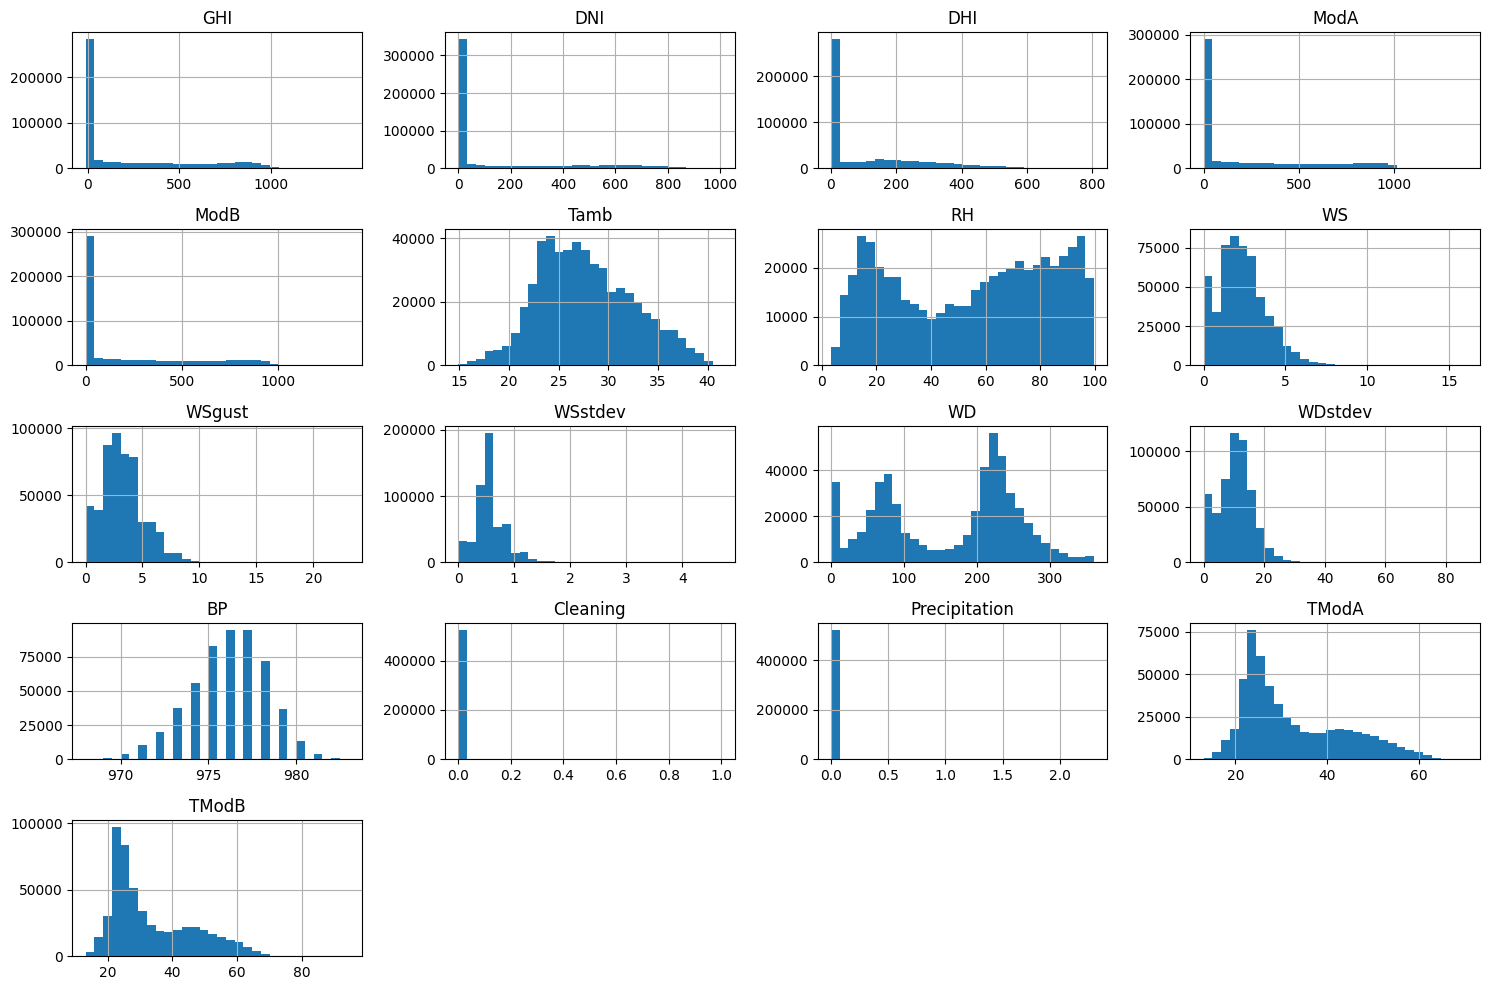

In [9]:
import matplotlib.pyplot as plt

df.select_dtypes(include='number').hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [10]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for '{col}':\n")
    print(df[col].value_counts())


Value counts for 'Timestamp':

Timestamp
2021-10-25 00:01    1
2022-06-25 06:36    1
2022-06-25 08:10    1
2022-06-25 08:09    1
2022-06-25 08:08    1
                   ..
2022-02-23 15:55    1
2022-02-23 15:54    1
2022-02-23 15:53    1
2022-02-23 15:52    1
2022-10-25 00:00    1
Name: count, Length: 525600, dtype: int64
